In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [ ]:
# Function to initialize centroids randomly
def initialize_centroids(k, data):
    centroids = []
    for _ in range(k):
        centroid = [np.random.uniform(min(data[:, i]), max(data[:, i])) for i in range(data.shape[1])]
        centroids.append(centroid)
    return np.array(centroids)

In [ ]:
# Function to assign data points to clusters
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        nearest_centroid = np.argmin(distances)
        clusters[nearest_centroid].append(point)
    return clusters

In [ ]:
 # Function to calculate new centroids based on the mean of each cluster
def update_centroids(clusters):
    return [np.mean(cluster, axis=0) for cluster in clusters]

In [ ]:
# Function to calculate the error (total sum of squared errors) for a given set of clusters and centroids
def calculate_error(clusters, centroids):
    error = 0
    for i in range(len(clusters)):
        for point in clusters[i]:
            error += euclidean_distance(point, centroids[i])**2
    return error / len(clusters)

In [ ]:
# Function to perform K-means clustering for a range of K values and print the error for each K
def k_means_clustering(data, k_range, epochs=20):
    errors = []
    for k in k_range:
        min_error = float('inf')
        for _ in range(epochs):
            centroids = initialize_centroids(k, data)
            for _ in range(epochs):
                clusters = assign_clusters(data, centroids)
                centroids = update_centroids(clusters)
            error = calculate_error(clusters, centroids)
            if error < min_error:
                min_error = error
        errors.append(min_error)
        print(f"For k = {k}, After {epochs} iterations: Error = {min_error:.4f}")
    return errors

Processing dataset: C:/Users/balur/OneDrive/Desktop/UTA/Sem-4/RohitKalayn/DM/Assingments/P3/UCI_datasets/pendigits_training.txt
For k = 2, After 20 iterations: Error = 43758862.4208
For k = 3, After 20 iterations: Error = 23350596.6032
For k = 4, After 20 iterations: Error = 14545572.6323
For k = 5, After 20 iterations: Error = 10291044.8617
For k = 6, After 20 iterations: Error = 7605157.5041


C:\Users\balur\anaconda3\envs\spark2\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\balur\anaconda3\envs\spark2\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


For k = 7, After 20 iterations: Error = 5897521.1290
For k = 8, After 20 iterations: Error = 4846559.9344
For k = 9, After 20 iterations: Error = 4046532.3155
For k = 10, After 20 iterations: Error = 3452002.9462


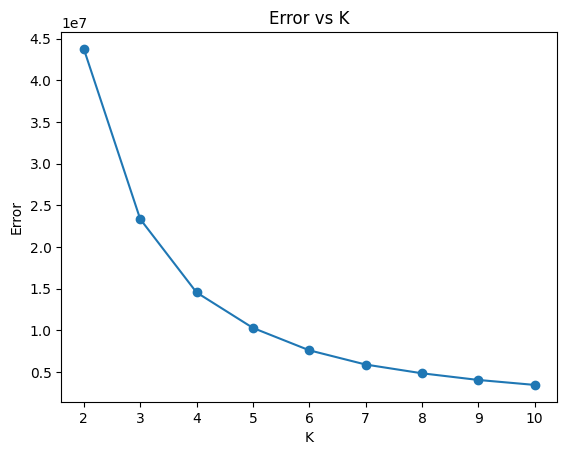

Processing dataset: C:/Users/balur/OneDrive/Desktop/UTA/Sem-4/RohitKalayn/DM/Assingments/P3/UCI_datasets/satellite_training.txt
For k = 2, After 20 iterations: Error = 16802207.9136
For k = 3, After 20 iterations: Error = 5801245.5685
For k = 4, After 20 iterations: Error = 3588413.5198
For k = 5, After 20 iterations: Error = 2542872.8017
For k = 6, After 20 iterations: Error = 1886931.4684
For k = 7, After 20 iterations: Error = 1496031.1835
For k = 8, After 20 iterations: Error = 1250858.6823
For k = 9, After 20 iterations: Error = 1021250.3089
For k = 10, After 20 iterations: Error = 874997.2714


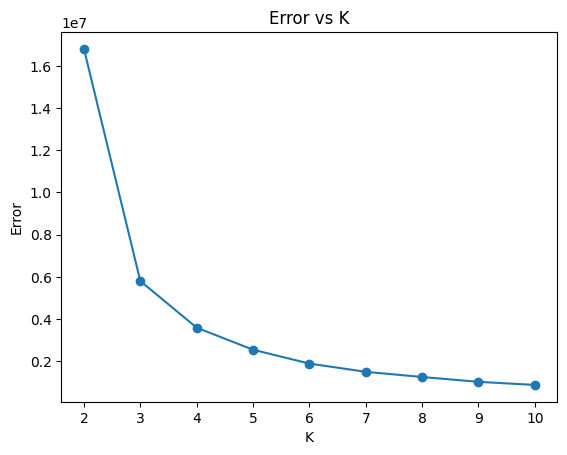

Processing dataset: C:/Users/balur/OneDrive/Desktop/UTA/Sem-4/RohitKalayn/DM/Assingments/P3/UCI_datasets/yeast_training.txt
For k = 2, After 20 iterations: Error = 32.0750
For k = 3, After 20 iterations: Error = 17.8227
For k = 4, After 20 iterations: Error = 11.7559
For k = 5, After 20 iterations: Error = 8.3740
For k = 6, After 20 iterations: Error = 6.6556
For k = 7, After 20 iterations: Error = 5.0464
For k = 8, After 20 iterations: Error = 4.1514
For k = 9, After 20 iterations: Error = 9.3537
For k = 10, After 20 iterations: Error = 2.9991


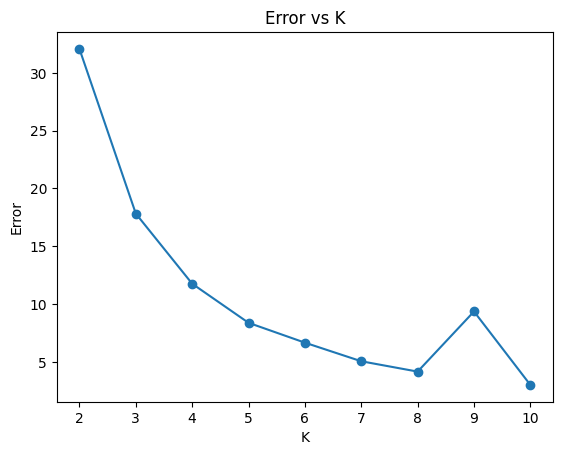

In [1]:
# Define the file paths for the datasets
file_paths = [
    'C:/Users/balur/OneDrive/Desktop/UTA/Sem-4/RohitKalayn/DM/Assingments/P3/UCI_datasets/pendigits_training.txt',
    'C:/Users/balur/OneDrive/Desktop/UTA/Sem-4/RohitKalayn/DM/Assingments/P3/UCI_datasets/satellite_training.txt',
    'C:/Users/balur/OneDrive/Desktop/UTA/Sem-4/RohitKalayn/DM/Assingments/P3/UCI_datasets/yeast_training.txt'
]

# Iterate over the file paths
for file_path in file_paths:
    print(f"Processing dataset: {file_path}")
    
    # Load the dataset from the file
    data = np.loadtxt(file_path)
    
    # Extract features (exclude the last column which contains class labels)
    X = data[:, :-1]
    
    # Define the range of K values
    k_range = range(2, 11)
    
    # Perform K-means clustering for the given range of K values and print the errors
    errors = k_means_clustering(X, k_range)
    
    # Plot the Error vs K chart
    plt.plot(k_range, errors, marker='o')
    plt.xlabel('K')
    plt.ylabel('Error')
    plt.title('Error vs K')
    plt.show()
